## NDBC-Explore 
## Run the cells in sequence to select dataset and variables to plot for the selected station

In [14]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import urllib.request, json
import helpers
from datetime import datetime, date, time
from ipywidgets import widgets  
from IPython import get_ipython
from IPython.display import display
from matplotlib import pylab
from pylab import *
from IPython.display import clear_output

In [15]:
%%javascript
function getQueryStringValue (key){  
    return unescape(window.location.search.replace(new RegExp("^(?:.*[&\\?]" + escape(key).replace(/[\.\+\*]/g, "\\$&") + "(?:\\=([^&]*))?)?.*$", "i"), "$1"));
}
IPython.notebook.kernel.execute("docID='".concat(getQueryStringValue("docID")).concat("'"));

<IPython.core.display.Javascript object>

In [16]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#construct url from variable
cinergi_url = "http://cinergi.sdsc.edu/geoportal/rest/metadata/item/" + docID

#Create dropdown Buttons and generate table
data_dropdown_options = helpers.create_dropdown_data (cinergi_url)
#Create widget with dropdown options from list created above
def f(notebooks_menu):
    return notebooks_menu
# out = interact(f, notebooks_menu=nb_menu);
out = interact(f, notebooks_menu=data_dropdown_options.keys());


interactive(children=(Dropdown(description='notebooks_menu', options=('0. http://www.ndbc.noaa.gov/view_text_f…

In [18]:
chosen_url = data_dropdown_options[out.widget.result]
data = helpers.create_data_from_urls([chosen_url])

# Create Key Values for graph.
graphKeyVals = []

#Run all operations on Data
for i in range(len(data)):
    data[i].fillna('')
    data[i] = helpers.simplify_column_names(data[i])
    data[i] = helpers.createDateTime(data[i])
    graphKeyVals.append( data[i]['date_time'][0].year)
    data[i]['date_time']= data[i]['date_time'].apply(lambda x: x.replace(year= 2012))
#Create dropdown Buttons and generate table
dropdown_options = helpers.create_dropdowns(data)
dropdown_options.append('Choose Variable')

 read file: http://www.ndbc.noaa.gov/view_text_file.php?filename=venf1c2002.txt.gz&dir=data/historical/cwind/


"2001 's data (number of variables in each column)"

,year,month,day,hour,minute,DIR,SPD,GDR,GSP,GMN,date_time
0,51336,51336,51336,51336,51336,50506,50695,8422,8451,8452,51336


In [5]:
chosen_url

'http://www.ndbc.noaa.gov/view_text_file.php?filename=venf1h2010.txt.gz&dir=data/historical/stdmet/'

Populating the interactive namespace from numpy and matplotlib


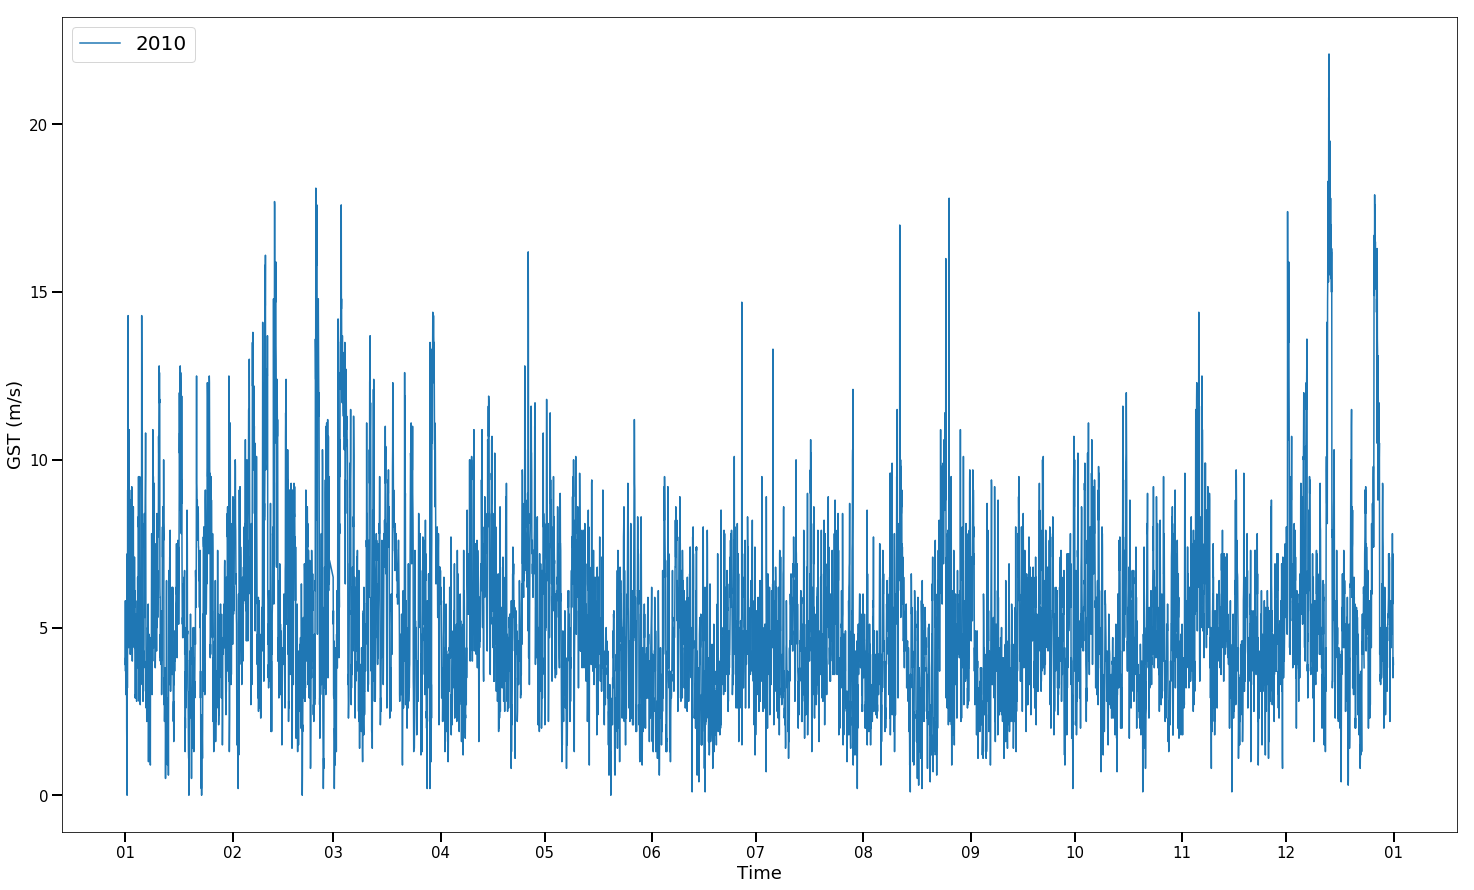

In [8]:
# Example plot of the image based on values of WTMP (Can be changed to other variables)

#Create widget with dropdown options from list created above
w = widgets.Dropdown(
    options=dropdown_options,
    description='Number:',
    disabled=False,
    value = "Choose Variable"
)

#Describe what happens when the button changes its value
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output()
        %pylab inline
        pylab.rcParams['figure.figsize'] = (25, 15)
        helpers.plotTimeSeriesData(data,change['new'],graphKeyVals)

w.observe(on_change)
display(w)

In [99]:
#submit usage metadata back to DDH


In [9]:
#do you want to show it in Suave
suave_dict = {
    'Yes': 1,
    'No': 0,
}

def f(suave_menu):
    return suave_menu

suave_interact_out = interact(f, suave_menu=suave_dict)

print("Do you want to send this dataframe to SuAVE?")

interactive(children=(Dropdown(description='suave_menu', options={'No': 0, 'Yes': 1}, value=0), Output()), _do…

Do you want to send this dataframe to SuAVE?


In [11]:
if (suave_interact_out.widget.result == 1):

    from IPython.display import display
    input_survey_text = widgets.Text()
    output_survey_text = widgets.Text()


    def bind_input_to_output(sender):
        output_survey_text.value = input_survey_text.value

    # Tell the text input widget to call bind_input_to_output() on submit
    input_survey_text.observe(bind_input_to_output)

    print("Input survey name here:")
    # Display input text box widget for input
    display(input_survey_text)

    display(output_survey_text)

Input survey name here:


Text(value='')

Text(value='')

In [12]:
if (suave_interact_out.widget.result == 1):

    input_user_text = widgets.Text()
    output_user_text = widgets.Text()

    def bind_input_to_output(sender):
        output_user_text.value = input_user_text.value
    
    input_user_text.observe(bind_input_to_output)

    print("Insert user name here:")
    display(input_user_text)
    display(output_user_text)

Insert user name here:


Text(value='')

Text(value='')

In [13]:
import requests
import os
import re
if (suave_interact_out.widget.result == 1):

    survey_name = output_survey_text.value
    user_name = output_user_text.value

    new_file_path = os.path.join("../../temp_csvs", survey_name + ".csv")
    
    new_data = data[0]
    new_data.dropna(axis=1, how='all', inplace=True)

    new_data = new_data.where((pd.notnull(new_data)), '')
    new_data.columns = [str(col) + '#number' for col in new_data.columns]

    
    
    csv_file = new_data.to_csv(new_file_path, index=None)
    upload_url = "http://suave-dev.sdsc.edu:3001/uploadCSV"
    new_survey_url_base = "https://suave-dev.sdsc.edu/main/file="
    

    upload_data = {'name':survey_name, 'dzc':'' ,'user':user_name}
    files = {"file": open(new_file_path, "rb")}
    r = requests.post(upload_url, files=files, data=upload_data)
    print(r.status_code, r.reason)

    regex = re.compile('[^0-9a-zA-Z_]')

    url = new_survey_url_base + user_name + "_" + survey_name + ".csv" + "&views=1110000&view=bucket"
    print(url)
    print ("Click the URL to open the new survey")



200 OK
https://suave-dev.sdsc.edu/main/file=zaslavsk_dds88.csv&views=1110000&view=bucket
Click the URL to open the new survey


In [ ]:
if (suave_interact_out.widget.result == 1):
    